Forward Euler

In [4]:
def forward_euler(gamma, beta, delta_t, rho, sigma, time, I_w_0, E_w_0):
    # phi = 0 at time 0 but is a fixed constant at Aug 5 (t = 144) and Oct 7 (t = 206) which lasted 31d and 10d respectively 
    S = [1 - I_w_0 - E_w_0]
    E_ov = [0]
    E_ot = [0] 
    E_w = [E_w_0]
    I_ov = [0] 
    I_ot = [0]
    I_w = [I_w_0]
    R_ov = [0]
    R_ot = [0]
    R_w = [0]
    
    for t in range(1, time):
        # first vaccine campaign (aug 5) lasted 31 days and second vaccine campaigns (oct 7) lasted 10 days
        if 144 <= t <= 175 or 206 <= t <= 216:
            phi = 0.8 * 0.074
        else: 
            phi = 0
            
        s_t = S[t-1] + delta_t*(-rho*beta*S[t-1]*(I_ov[t-1] + I_ot[t-1]) - beta*S[t-1]*I_w[t-1] - phi*S[t-1])
        S.append(s_t)
        
        e_ov_t = E_ov[t-1] + delta_t*(phi*S[t-1] - sigma*E_ov[t-1])
        E_ov.append(e_ov_t)
        
        e_ot_t = E_ot[t-1] + delta_t*(rho*beta*S[t-1]*(I_ov[t-1] + I_ot[t-1]) - sigma*E_ot[t-1])
        E_ot.append(e_ot_t)
        
        e_w_t = E_w[t-1] + delta_t*(beta*S[t-1]*I_w[t-1] - sigma*E_w[t-1])
        E_w.append(e_w_t)
        
        i_ov_t = I_ov[t-1] + delta_t*(sigma*E_ov[t-1] - gamma*I_ov[t-1])
        I_ov.append(i_ov_t)
        
        i_ot_t = I_ot[t-1] + delta_t*(sigma*E_ot[t-1] - gamma*(I_ot[t-1]))
        I_ot.append(i_ot_t)
        
        i_w_t = I_w[t-1] + delta_t*(sigma*E_w[t-1] - gamma*I_w[t-1])
        I_w.append(i_w_t)
        
        r_ov_t = R_ov[t-1] + delta_t*(gamma*I_ov[t-1])
        R_ov.append(r_ov_t)
        
        r_ot_t = R_ot[t-1] + delta_t*(gamma*I_ot[t-1])
        R_ot.append(r_ot_t)
        
        r_w_t = R_w[t-1] + delta_t*(gamma*I_w[t-1])
        R_w.append(r_w_t)
    
    return S, E_ov, E_ot, E_w, I_ov, I_ot, I_w, R_ov, R_ot, R_w

In [27]:
def E_w_estimate(gamma, beta, delta_t, rho, sigma, time, phi = 0):
    S = [1 - 0.001 - (gamma/sigma*0.001)]
    E_ov = [0]
    E_ot = [0] 
    E_w = [gamma/sigma*0.001]
    I_ov = [0] 
    I_ot = [0]
    I_w = [0.001]
    R_ov = [0]
    R_ot = [0]
    R_w = [0]
    
    for t in range(1, time):
            
        s_t = S[t-1] + delta_t*(-rho*beta*S[t-1]*(I_ov[t-1] + I_ot[t-1]) - beta*S[t-1]*I_w[t-1] - phi*S[t-1])
        S.append(s_t)
        
        e_ov_t = E_ov[t-1] + delta_t*(phi*S[t-1] - sigma*E_ov[t-1])
        E_ov.append(e_ov_t)
        
        e_ot_t = E_ot[t-1] + delta_t*(rho*beta*S[t-1]*(I_ov[t-1] + I_ot[t-1]) - sigma*E_ot[t-1])
        E_ot.append(e_ot_t)
        
        e_w_t = E_w[t-1] + delta_t*(beta*S[t-1]*I_w[t-1] - sigma*E_w[t-1])
        E_w.append(e_w_t)
        
        i_ov_t = I_ov[t-1] + delta_t*(sigma*E_ov[t-1] - gamma*I_ov[t-1])
        I_ov.append(i_ov_t)
        
        i_ot_t = I_ot[t-1] + delta_t*(sigma*E_ot[t-1] - gamma*(I_ot[t-1] + I_ov[t-1]))
        I_ot.append(i_ot_t)
        
        i_w_t = I_w[t-1] + delta_t*(sigma*E_w[t-1] - gamma*I_w[t-1])
        I_w.append(i_w_t)
        
        r_ov_t = R_ov[t-1] + delta_t*(gamma*I_ov[t-1])
        R_ov.append(r_ov_t)
        
        r_ot_t = R_ot[t-1] + delta_t*(gamma*I_ot[t-1])
        R_ot.append(r_ot_t)
        
        r_w_t = R_w[t-1] + delta_t*(gamma*I_w[t-1])
        R_w.append(r_w_t)
        
        if I_w[t] == 0.00434:
            return E_w[t]
    
    

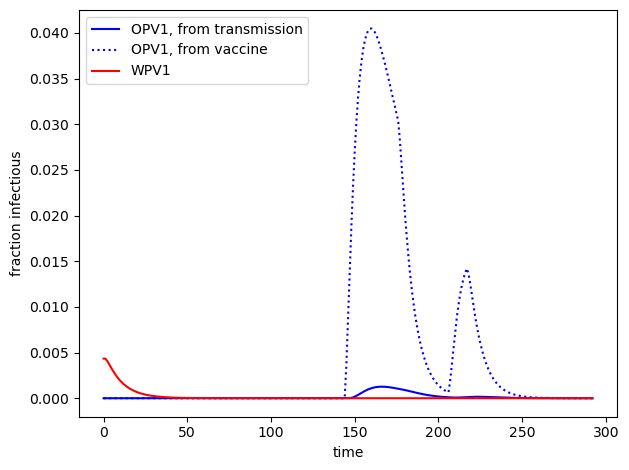

In [30]:
import matplotlib.pyplot as plt

# Parameter sets
rho = 0.37
sigma = 0.25
delta_t = 0.5
time = 293 # days march 11 to end of december
# estimated parameters
beta = 0.151
gamma = 0.93
I_w_0 = 0.00434
E_w_0 = gamma/sigma*I_w_0
#E_w_0 = E_w_estimate(gamma, beta, delta_t, rho, sigma, time)

# Simulate and plot
S, E_ov, E_ot, E_w, I_ov, I_ot, I_w, R_ov, R_ot, R_w = forward_euler(gamma, beta, delta_t, rho, sigma, time, I_w_0, E_w_0)
plt.plot(I_ot, label='OPV1, from transmission', color='blue')
plt.plot(I_ov, label='OPV1, from vaccine', color='blue' , linestyle ='dotted')
plt.plot(I_w, label='WPV1', color='red')
plt.xlabel("time")
plt.ylabel("fraction infectious")
plt.legend()

plt.tight_layout()
plt.show()